**SALES FORECAST**

this data analysis is done by Sakshi K More

importing all the required libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from ipywidgets import interact


loading the dataset

In [57]:
data=pd.read_csv('train.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


displaying the shape of the data

In [142]:
data.shape

(9800, 21)

displaying the columns of the data

In [58]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

displaying the data types of the columns of the dataset

In [143]:
data.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Year                      int64
Month                     int64
Day                       int64
dtype: object

converting the columns 'ship date' and 'order date' in datetime format

In [144]:
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Order Date']=data['Order Date'].dt.strftime("%Y-%m-%d")
data['Ship Date']=pd.to_datetime(data['Ship Date'])
data['Ship Date']=data['Ship Date'].dt.strftime("%Y-%m-%d")

to check if the data contains any null values

In [145]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Year             0
Month            0
Day              0
dtype: int64

this shows that postal code contains 11 null values . lets fill it with 0

In [146]:
data.fillna(0,inplace=True)

In [147]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Year             0
Month            0
Day              0
dtype: int64

to check if the data contains any duplicated values and if it contains lets drop that duplicated values

In [148]:
data.duplicated().sum()

0

lets get the information of the data

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
 18  Year    

let us describe the numerical columns in the data

In [150]:
data.describe()

,Row ID,Postal Code,Sales,Year,Month,Day
count,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059,2016.724184,7.186122,16.119184
std,2829.160653,32076.677954,626.651875,1.123984,3.424108,8.073122
min,1.000000,0.000000,0.444000,2015.000000,1.000000,1.000000
25%,2450.750000,23223.000000,17.248000,2016.000000,4.000000,10.000000
50%,4900.500000,57551.000000,54.490000,2017.000000,8.000000,16.000000
75%,7350.250000,90008.000000,210.605000,2018.000000,10.000000,23.000000
max,9800.000000,99301.000000,22638.480000,2018.000000,12.000000,31.000000


lets find the maximum and minimum date we have in the data

In [151]:
print("Max date is : ",data['Order Date'].max())
print("Min date is : ",data['Order Date'].min())

Max date is :  2018-12-30
Min date is :  2015-01-02


this shows that we have four years data

lets check minimum and maximum sales in this four years

In [152]:
print("minimum sales is : ",data['Sales'].min())
print("maximum sales is : ",data['Sales'].max())

minimum sales is :  0.444
maximum sales is :  22638.48


creating 3 new columns from the Order Date column . Those are Year, Month and Day

In [153]:
data['Order Date']=pd.to_datetime(data['Order Date'])

In [154]:
data['Year']=data['Order Date'].dt.year
data['Month']=data['Order Date'].dt.month
data['Day']=data['Order Date'].dt.day

lets get the value count of the segments from the data

In [155]:
data['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

lets create an interactive countplot that shows counts of sales per month as per the year selected by the user

In [156]:
@interact(year=data['Year'].unique())
def segment(year):
  req_data=data[data['Year']==year]

  ax=sns.countplot(x='Month',data=req_data)
  for bars in ax.containers:
    ax.bar_label(bars)
  plt.title(f"Month wise Count fot the year {year} ")
  plt.xlabel('Month')
  plt.ylabel('Counts')
  plt.show()


interactive(children=(Dropdown(description='year', options=(2017, 2016, 2015, 2018), value=2017), Output()), _…

lets create an interactive pie chart that shows the count of category as per the year selected by the user

In [157]:
@interact(year=data['Year'].unique())
def category(year):
  req=data[data['Year']==year]
  plt.pie(req['Category'].value_counts(),autopct=f"%1.1f%%",colors=['pink','purple','cyan'])
  plt.legend(data['Category'])
  plt.title("NUmber of sales as per Category")
  plt.show()

interactive(children=(Dropdown(description='year', options=(2017, 2016, 2015, 2018), value=2017), Output()), _…

displaying the value count of the sub category in the sales dataset in the form of graph

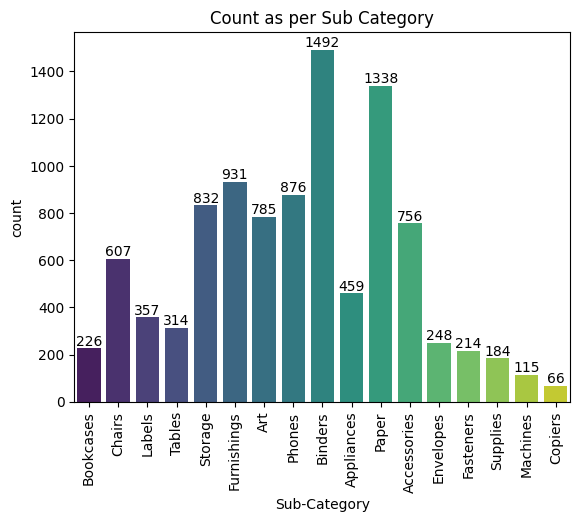

In [159]:
ax=sns.countplot(x='Sub-Category',data=data,palette='viridis')
plt.xticks(rotation=90)
plt.title("Count as per Sub Category")
for bars in ax.containers:
  ax.bar_label(bars)

creating an interactive plot that shows the trends of the sales over months and according to the year selected by the user

In [160]:
@interact(year=data['Year'].unique())
def sales(year):
  req1=data[data['Year']==year]
  sales = req1.groupby('Month')['Sales'].sum()

  # Create a line plot to visualize the sales trend
  plt.figure(figsize=(8,8))
  plt.plot(sales.index, sales.values)
  plt.xlabel('Months')
  plt.ylabel('Total Sales')
  plt.title(f'{year} Sales Trend Over Time')
  plt.xticks(rotation=45)
  plt.show()

interactive(children=(Dropdown(description='year', options=(2017, 2016, 2015, 2018), value=2017), Output()), _…

creating a bar chart that shows the yearly sales for the data

Text(0.5, 1.0, 'Yearly Sales')

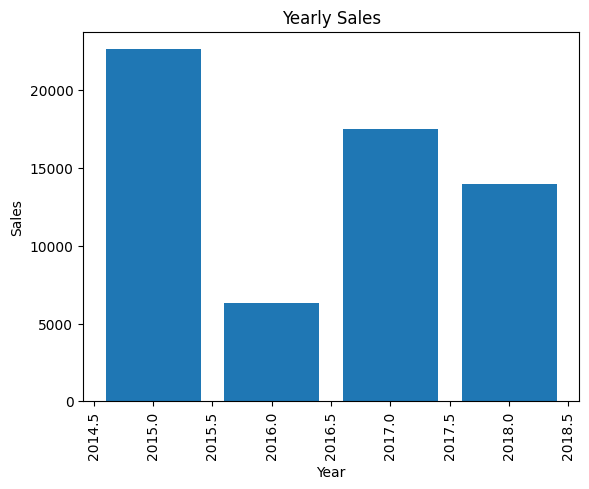

In [161]:
x=data['Year']
y=data['Sales']
plt.bar(x,y)
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.title("Yearly Sales")

lets create an interactive pie chart that shows the region wise sales and filter it as per the year selected by the user

In [162]:
@interact(year=data['Year'].unique())
def region(year):
  req2=data[data['Year']==year].groupby('Region')['Sales'].sum()
  plt.pie(req2,autopct="%1.1f%%")
  plt.legend(data['Region'],loc='upper right')
  plt.title('Regionwise sales')
  plt.show()

interactive(children=(Dropdown(description='year', options=(2017, 2016, 2015, 2018), value=2017), Output()), _…